Youtube: install visual studio code + python 3.10
Install: tensorflow: ai model
install: matplotlib: plot
install: numpy: lien quan cac phep tinh toan


In [68]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers, models

In [8]:

# Settings
nsamples = 1000     # Number of samples to use as a dataset
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.2    # Percentage of samples that should be held for test set
tflite_model_name = 'sine_model'  # Will be given .tflite suffix
c_model_name = 'sine_model'       # Will be given .h suffix

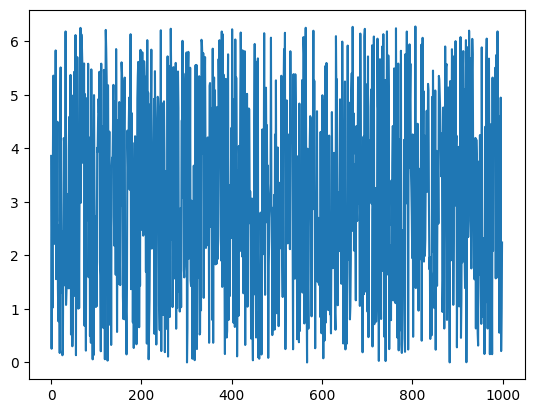

In [69]:

# Generate some random samples
#np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

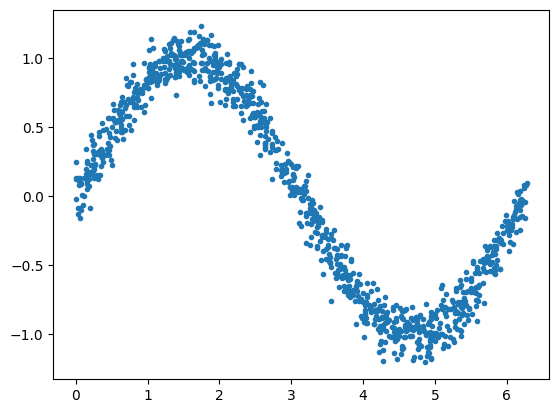

In [70]:

# Create a noisy sinewave with these values
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

Mua sensor
Lay gia tri cua sensor tuong ung voi tung label
1Data collection
2Data preparation

(800,)
(800,)
(200,)
(200,)


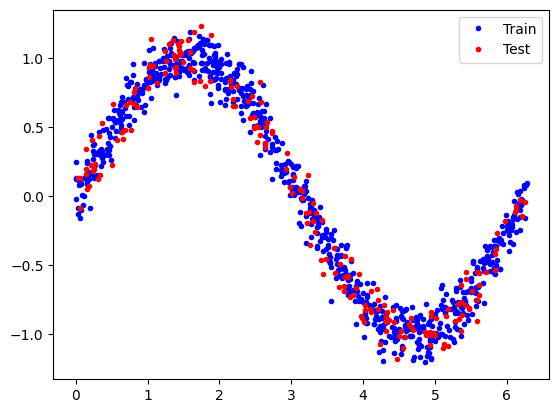

In [72]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (không có tập validation)
test_split = int(test_ratio * nsamples)
x_test, x_train = np.split(x_values, [test_split])
y_test, y_train = np.split(y_values, [test_split])

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# Kiểm tra kích thước tổng cộng của các tập
assert(x_train.size + x_test.size) == nsamples

# Vẽ biểu đồ dữ liệu huấn luyện (xanh) và dữ liệu kiểm tra (đỏ)
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

(600,)
(600,)


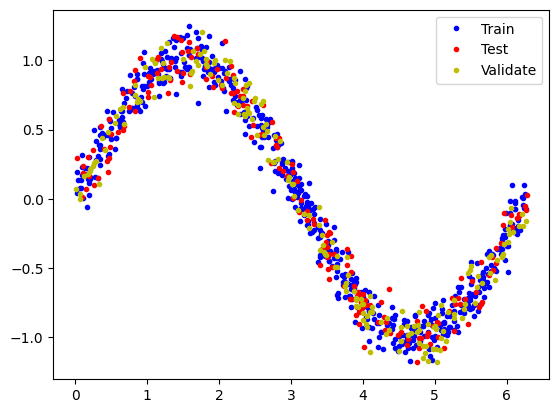

In [11]:

# Plit the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])
print(x_train.shape)
print(y_train.shape)
# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == nsamples

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()
     


In [56]:
print(x_train.shape[0])

800


In [80]:

# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='sigmoid', input_shape=(1,)))
model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Dense(1))

param = (trong so weigth + bias)*neurons =32

In [74]:
# View model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                32        
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Bộ tối ưu (optimizer) là thuật toán được sử dụng để cập nhật các trọng số (weights) của mô hình sao cho hàm mất mát (loss function) hay cost function đạt giá trị nhỏ nhất có thể trên tập dữ liệu huấn luyện.

(Root Mean Square Propagation) RMSprop: RMSprop là một thuật toán tối ưu hóa thích ứng, có khả năng tự động điều chỉnh tốc độ học (learning rate) cho từng trọng số. Nó thường hoạt động tốt trong các bài toán học sâu.

new_weight = old_weight - learning_rate * update

Ngoài ra có thể dùng các thuật toán mặc định như "Adam (Adaptive Moment Estimation)": Nó thích ứng với từng tham số bằng cách tính toán các tỷ lệ học tập riêng biệt, giúp tăng tốc độ hội tụ và hiệu suất.

In [81]:

# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

Tập dữ liệu huấn luyện (x_train, y_train) được chia thành các batch nhỏ hơn, mỗi batch có kích thước là 32 trong trường hợp này. giúp tăng tốc độ huấn luyện.

In [82]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size = 32,
                    # validation_data=(x_val, y_val)
                    )

Epoch 1/500
25/25 [==============================] - 1s 3ms/step - loss: 0.6379 - mae: 0.6379
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5979 - mae: 0.5979
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5663 - mae: 0.5663
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5363 - mae: 0.5363
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5094 - mae: 0.5094
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4861 - mae: 0.4861
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4650 - mae: 0.4650
Epoch 8/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4459 - mae: 0.4459
Epoch 9/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4313 - mae: 0.4313
Epoch 10/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4223 - mae: 0.4223
Epoch 11/500
25/25 [==============================] - 0s 2m

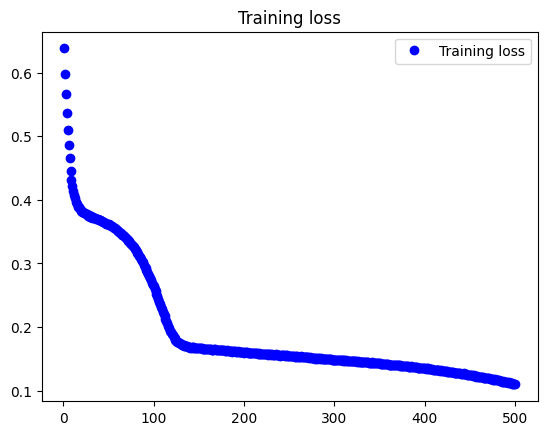

In [83]:
# Plot the training history
loss = history.history['loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

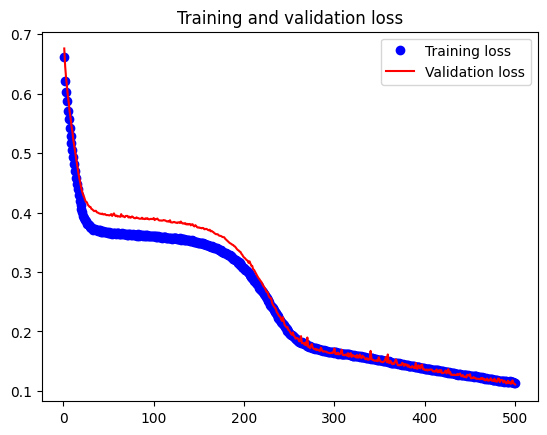

In [52]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 3ms/step


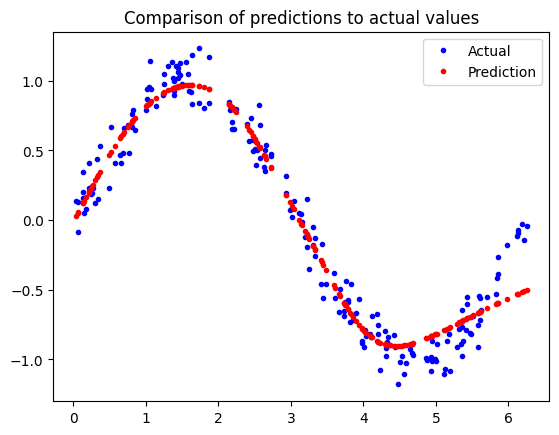

: 

In [84]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

#correlation coeff.

In [16]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\surface\AppData\Local\Temp\tmppx4d8tf5\assets


INFO:tensorflow:Assets written to: C:\Users\surface\AppData\Local\Temp\tmppx4d8tf5\assets


3168

In [50]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [51]:
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))